### Optimizers:

An optimizer is an algorithm or method used to adjust the parameters (e.g., weights and biases) of a neural network in order to minimize the loss function. Optimizers guide the training process based on the computed gradients.

### Why are they needed?

1. **Navigating the Loss Landscape**: The loss function of a neural network can be visualized as a high-dimensional landscape with valleys, hills, plateaus, and saddle points. The goal is to find the lowest point (global minimum) of this landscape where the loss is the smallest. Optimizers help the model navigate this landscape efficiently.
   
2. **Stabilizing Learning**: Simply updating the parameters using raw gradients can be unstable and may not converge. Optimizers use various techniques to stabilize and accelerate the learning process.
   
3. **Avoiding Local Minima**: Some optimizers use momentum-based techniques to avoid getting stuck in local minima and saddle points.

### At which step are they implemented?

The optimizers are used in the training loop, specifically during the parameter update step after the gradients are computed:

1. **Forward Pass**: Input data is passed through the network to get predictions.
2. **Loss Computation**: The difference between predictions and actual values is computed (this is the loss).
3. **Backward Pass**: Gradients of the loss with respect to model parameters are computed using backpropagation.
4. **Parameter Update (Optimizer's Role)**: The optimizer updates the model's parameters using the computed gradients.

### How do they fit into the neural netw calculation step?

1. **Basic Update (like Gradient Descent)**:
   - Weights are adjusted in the opposite direction by a factor of learning rate

2. **Momentum**:
   - Incorporates the gradient from the previous step to provide a sense of "momentum." This helps in navigating plateaus and vallein the loss landscape.
     
3. **Adaptive Learning Rates**:
   - Algorithms like AdaGrad, RMSProp, and Adam adjust the learning rates of each parameter dynamically. This on helps in faster convergence.

4. **Regularization**:
   - Some optimizers incorporate regularization directly into the update step, helping in preventing overfitting.

### Summary:

Optimizers play a crucial role in the training of neural networks. They define how the model's parameters are adjusted in response to the computed error. Without optimizers, training a neural network to convergence would be computationally inefficient and, in many cases, practically infeasible. The choice of optimizer and its parameters (like learning rate) can significantly impact the efficiency and quality of the training process.iency and quality of the training process.

In [18]:
def relu(x):
    return max(0, x)

relu(-5)
    

0

In [19]:
# Importing required libraries
import torch

# Random seed for reproducibility
torch.manual_seed(42)
# np.random.seed(42)


# Define weight and bias, initialized randomly
w = torch.randn(1, requires_grad=True)  # Weight
b = torch.randn(1, requires_grad=True)  # Bias

# Sample data
# x = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
x = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
y_true = torch.tensor([2.0, 4.0, 6 ,8, 10])

# Display initial weight and bias
w.item(), b.item()


(0.33669036626815796, 0.12880940735340118)

In [20]:
# Define a simple linear model
def model(x, w, b):
    return w * x + b

# Define the Mean Squared Error loss function
def mse_loss(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

# Forward pass
y_pred = model(x, w, b)

# Compute the loss
loss = mse_loss(y_pred, y_true)

# Backward pass (computes the gradients)
loss.backward()

# Gradients for weight and bias
w.grad, b.grad


(tensor([-35.8200]), tensor([-9.7222]))

In [21]:
## we do another step

# Define the learning rate
lr = 0.01

# Update weights and biases using the computed gradients
with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

# Zero out the gradients for the next iteration
w.grad.zero_()
b.grad.zero_()

# Forward pass with updated weights and biases
y_pred = model(x, w, b)

# Compute the loss with updated weights and biases
loss = mse_loss(y_pred, y_true)

# Compute the gradients again after updating
loss.backward()

# New gradients for weight and bias
w.grad, b.grad


(tensor([-27.3562]), tensor([-7.3786]))

In [23]:
b # not arashdir..

tensor([0.2260], requires_grad=True)

In [22]:
w

tensor([0.6949], requires_grad=True)

In [26]:
### now we "train"
# Reinitialize weight and bias
torch.manual_seed(42)
w = torch.randn(1, requires_grad=True)  # Weight
b = torch.randn(1, requires_grad=True)  # Bias

# Define the learning rate
lr = 0.01

activ = lambda x: x

# Store initial weight for comparison
initial_weight = w.item()

# Training loop with Gradient Descent for 10 iterations
for epoch in range(1000):
    # Forward pass
    y_pred = model(x, w, b)
    # Compute the loss

    loss = mse_loss(y_pred, y_true)
    # Backward pass, gradient
    loss.backward()
    # Update weights and biases using Gradient Descent
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
        # Zero out the gradients for the next iteration
        w.grad.zero_()
        b.grad.zero_()

# Return the initial and final weights
initial_weight, w.item()


(0.33669036626815796, 1.9948710203170776)

In [27]:
b.item()

0.01851714216172695

In [11]:
loss

tensor(0.0005, grad_fn=<MeanBackward0>)

In [51]:
b.item(
)

-38.71831512451172

In [ ]:
y = w_1 * x_1 + w_2 * x_2 
d_y_w_1 = x_1 + 0
d_y_w_2 = x_2 + 0

## GRADIENT EXPLANATION TODO - > SEND ARTICLE

In [49]:
## Now try with some activation function




# Define the ReLU activation function -> relu is either zero or x, whichever is higher
def relu(x):
    return torch.max(torch.tensor(0.0), x)

# exactly the same thing
def relu_2(x):
    return max(0, x)

# Reinitialize weight and bias
#torch.manual_seed(42)
w = torch.tensor(10.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)
#w = torch.randn(1, requires_grad=True)
#b = torch.randn(1, requires_grad=True)

# Sample data
x = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
y_true = torch.tensor([3.0, 5.0, 7.0, 9.0, 11.0])

# w_true = 2, b_true = 1

# Store initial weight for comparison
initial_weight_with_relu = w.item()



# Define the learning rate again
lr = 0.001

# Training loop with Gradient Descent and ReLU activation for 20 iterations
for epoch in range(1000):
    # Forward pass with ReLU activation
    y_pred = relu(model(x, w, b))
    # Compute the loss
    loss = mse_loss(y_pred, y_true)
    # Backward pass (computes the gradients)
    loss.backward()
    # Update weights and biases using Gradient Descent
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
        # Zero out the gradients for the next iteration
        w.grad.zero_()
        b.grad.zero_()

# Return the initial and final weights with ReLU activation
initial_weight_with_relu, w.item(), b.item()


(10.0, 2.0396015644073486, 0.8570307493209839)

In [57]:
loss

tensor(155.1297, grad_fn=<MeanBackward0>)

### Why we randomly initialize weights?

The initialization of weights in neural networks is crucial for the learning process. Starting with random weights is a common practice, and here's why it's important:

1. **Breaking Symmetry**: If all weights are initialized with the same value, every neuron in a given layer will produce the same output during the forward pass and the same gradient during the backward pass. This means they will all update in the same way during training, essentially acting as one neuron rather than multiple neurons with different learned features. Random initialization breaks this symmetry, allowing each neuron to learn different features.

2. **Avoiding Saturation**: Especially for activation functions like sigmoid or tanh, if the weights are too large, the neuron's output can saturate, leading to vanishing gradients. This would mean very small updates during training, making the learning process extremely slow or even stagnant. Randomly initializing weights (typically with small values) helps in preventing this saturation at the beginning of training.

3. **Faster Convergence**: Starting with random weights often leads to faster convergence during training compared to starting with zero or constant weights.

4. **Preventing Dead Neurons**: In the context of certain activation functions like ReLU, initializing with small random weights can prevent neurons from becoming inactive (i.e., always outputting zero) throughout training.

5. **Exploring a Wider Solution Space**: Random initialization allows the model to explore a wider solution space, increasing the chances of finding a more optimaleding up training.

### Gradient descent

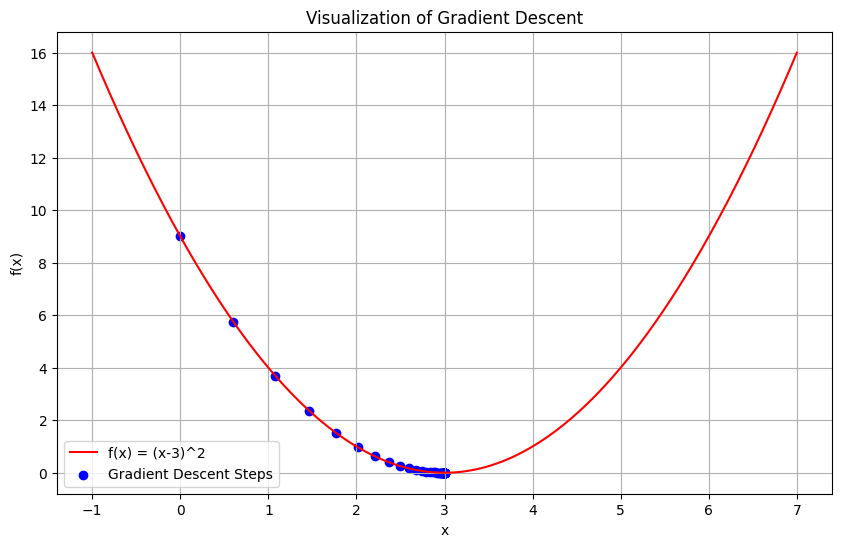

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def f(x):
    return (x - 3)**2

def gradient(x):
    return 2 * (x - 3)

# Gradient Descent
def gradient_descent(initial_x, learning_rate, n_iterations):
    x = initial_x
    history = [x]
    
    for _ in range(n_iterations):
        grad = gradient(x)
        x -= learning_rate * grad
        history.append(x)
    
    return history

# Parameters
initial_x = 0
learning_rate = 0.1
n_iterations = 50

# Gradient Descent History
x_history = gradient_descent(initial_x, learning_rate, n_iterations)

# Plotting
x = np.linspace(-1, 7, 400)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, '-r', label='f(x) = (x-3)^2')
plt.scatter(x_history, [f(x_val) for x_val in x_history], c='blue', marker='o', label='Gradient Descent Steps')
plt.title('Visualization of Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


In [51]:
from matplotlib.animation import FuncAnimation, PillowWriter

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, '-r', label='f(x) = (x-3)^2')
point, = ax.plot([], [], 'bo', label='Gradient Descent Step')
ax.set_title('Visualization of Gradient Descent Progress')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.grid(True)
ax.set_xlim([-1, 7])
ax.set_ylim([-1, 17])


def init():
    point.set_data([], [])
    return (point,)


def update(frame):
    point.set_data(x_history[frame], f(x_history[frame]))
    return (point,)

# Create the animation object
ani = FuncAnimation(fig, update, frames=np.arange(0, len(x_history)), init_func=init, blit=True, repeat=False)

# Display the animation
plt.close(fig)
ani.save("gradient_descent_animation.gif", writer=PillowWriter(fps=1))
ani

C:\Users\Emil\AppData\Local\Temp\ipykernel_19344\875961198.py:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x_history[frame], f(x_history[frame]))


### Stochastic grad descent



1. **Gradient Descent (Batch Gradient Descent)**:
    - **Dataset Usage**: Uses the entire dataset to compute the gradient of the cost function for each iteration of the training algorithm.
    - **Convergence**: Converges to the minimum in a more straightforward and less oscillatory manner than SGD.
    - **Computation**: Can be computationally expensive for large datasets because it requires holding the entire dataset in memory and computing the gradient based on the entire dataset.
    - **Frequency of Updates**: Less frequent updates (once per epoch).
    - **Parallelization**: Difficult to parallelize across multiple CPUs or GPUs.

2. **Stochastic Gradient Descent (SGD)**:
    - **Dataset Usage**: Uses only a single data point chosen randomly to compute the gradient at each step.
    - **Convergence**: Due to the high variance in updates, the trajectory towards the minimum can be oscillatory, making convergence noisy. However, this randomness can also help escape local minima.
    - **Computation**: Faster than GD as it updates the weights more frequently. Doesn't require the entire dataset in memory at once.
    - **Frequency of Updates**: Very frequent updates (once per data point).
    - **Parallelization**: Difficult to parallelize since the update depends on a single data point at a time.

3. **Mini-Batch Gradient Descent**:
    - **Dataset Usage**: Uses a small random subset (batch) of the data, rather than the full dataset or a single data point, to compute the gradient at each step.
    - **Convergence**: Tries to combine the best of both GD and SGD. It converges faster than both GD (since it doesn't use the whole dataset) and SGD (since the update direction is based on more than one example, reducing variance).
    - **Computation**: Allows a balance between computational efficiency (as in GD) and update frequency (as in SGD). Can take advantage of hardware optimization in matrix operations, especially when using GPUs.
    - **Frequency of Updates**: More frequent than GD but less frequent than SGD. The frequency depends on the batch size.
    - **Parallelization**: Easier to parallelize compared to SGD because multiple data points can be pSssed at once.

**In summary**:
- **GD** provides the most direct path to the minimum but can be slow and computationally intensive for large datasets.
- **SGD** provides faster updates but with a noisy trajectory. Its randomness can help escape local minima but might also prevent settling in the global minimum.
- **Mini-Batch GD** strikes a balance between GD and SGD, making it one of the most popular optimization algorithms in deep learning, especially when combined with techniques like momentum or adaptive learning rates.